### Import Libraries

In [1]:
import numpy                       
from matplotlib import pyplot    
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

Notes from Notebook:

When the solution becomes unstable:

What has happened is that over the time period Δt, the wave is travelling a distance which is greater than dx, and we say that the solution becomes unstable in this situation (this statement can be proven formally, see below). The length dx of grid spacing is inversely proportional to the number of total points nx: we asked for more grid points, so dx got smaller. Once dx got smaller than the cΔt—the distance travelled by the numerical solution in one time step—it's no longer possible for the numerical scheme to solve the equation correctly!

Then we can introduce the CFL condition to make sure that our solution becomes stable. Using the code from the notebook, we can define dt in the following way

In [2]:
def linearconv(nx):
    """Solve the linear convection equation.
    
    Solves the equation d_t u + c d_x u = 0 where 
    * the wavespeed c is set to 1
    * the domain is x \in [0, 2]
    * 20 timesteps are taken, with \Delta t computed using the CFL 0.5
    * the initial data is the hat function
    
    Produces a plot of the results
    
    Parameters
    ----------
    
    nx : integer
        number of internal grid points
        
    Returns
    -------
    
    None : none
    """
    dx = 2/(nx-1)
    nt = 20    
    c = 1
    sigma = .5
    x = numpy.linspace(0,2,nx)
    
    dt = sigma*dx

    u = numpy.ones(nx) 
    lbound = numpy.where(x >= 0.5)
    ubound = numpy.where(x <= 1)
    u[numpy.intersect1d(lbound, ubound)]=2 

    un = numpy.ones(nx)

    for n in range(nt):  
        un = u.copy() 
        u[1:] = un[1:] -c*dt/dx*(un[1:] -un[0:-1]) 
        u[0] = 1.0
        
    pyplot.plot(x, u, color='#003366', ls='--', lw=3)
    pyplot.ylim(0,2.5);

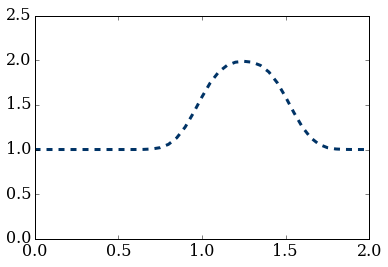

In [3]:
linearconv(41)

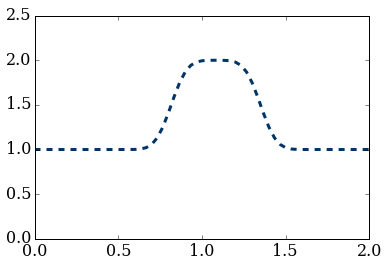

In [4]:
linearconv(61)

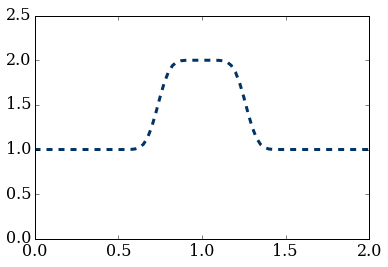

In [6]:
linearconv(81)

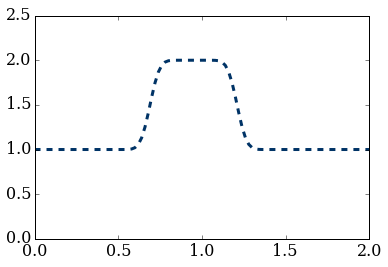

In [7]:
linearconv(101)

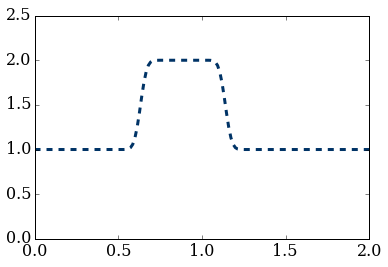

In [8]:
linearconv(151)

Note that as the number of gridpoints increase the wave is analyzed for a smaller time window, and this is why it appears to have travelled less with greater nx values. 